In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
import sklearn.datasets
import seaborn as sns

In [12]:
# DATA COLLECTION AND PROCESSING
df = pd.read_csv("breast_cancer.csv")


In [15]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:

# Add the target column
df['label'] = breast_cancer.target



In [32]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [ ]:
# number of rows and coloumns in the datasets
df.shape


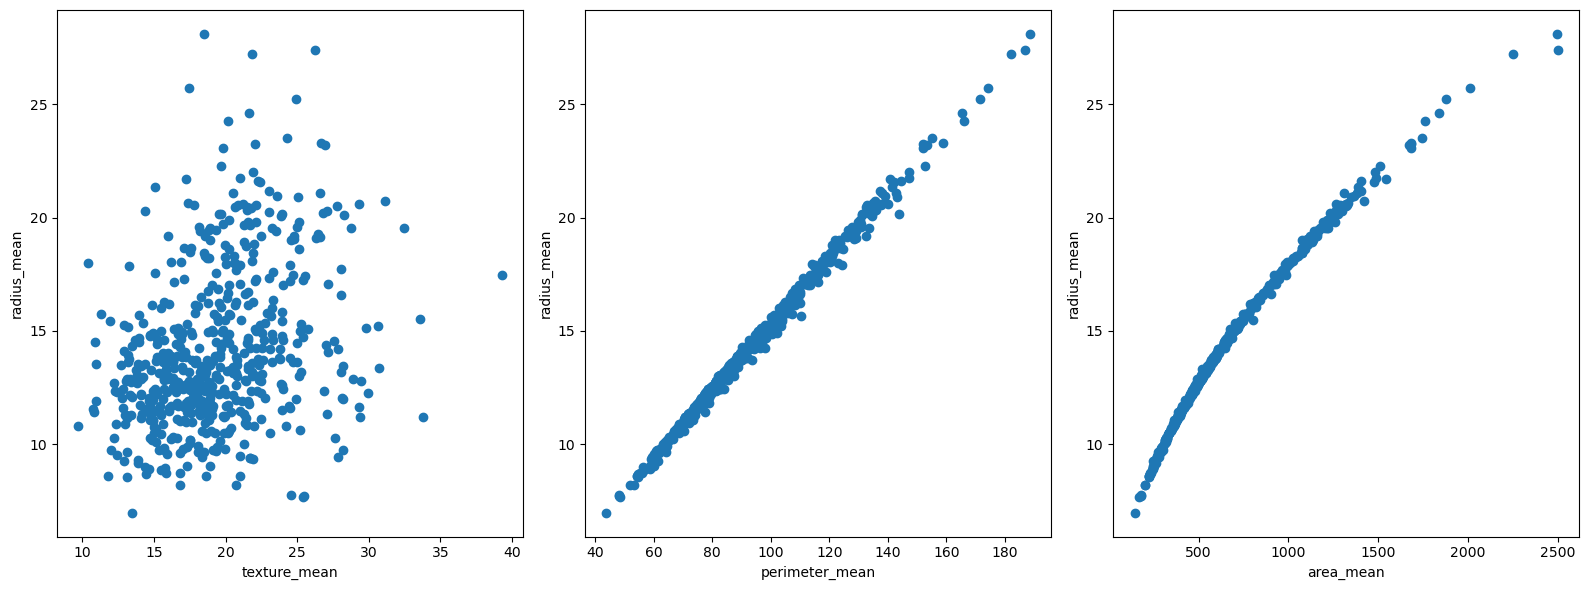

In [30]:
fig,axes = plt.subplots(nrows=1 , ncols=3, figsize=(16,6))
axes[0].plot(df['texture_mean'],df['radius_mean'],'o')
axes[0].set_ylabel('radius_mean')
axes[0].set_xlabel('texture_mean')


axes[1].plot(df['perimeter_mean'],df['radius_mean'],'o')
axes[1].set_ylabel('radius_mean')
axes[1].set_xlabel('perimeter_mean')


axes[2].plot(df['area_mean'],df['radius_mean'],'o')
axes[2].set_ylabel('radius_mean')
axes[2].set_xlabel('area_mean')

plt.tight_layout();


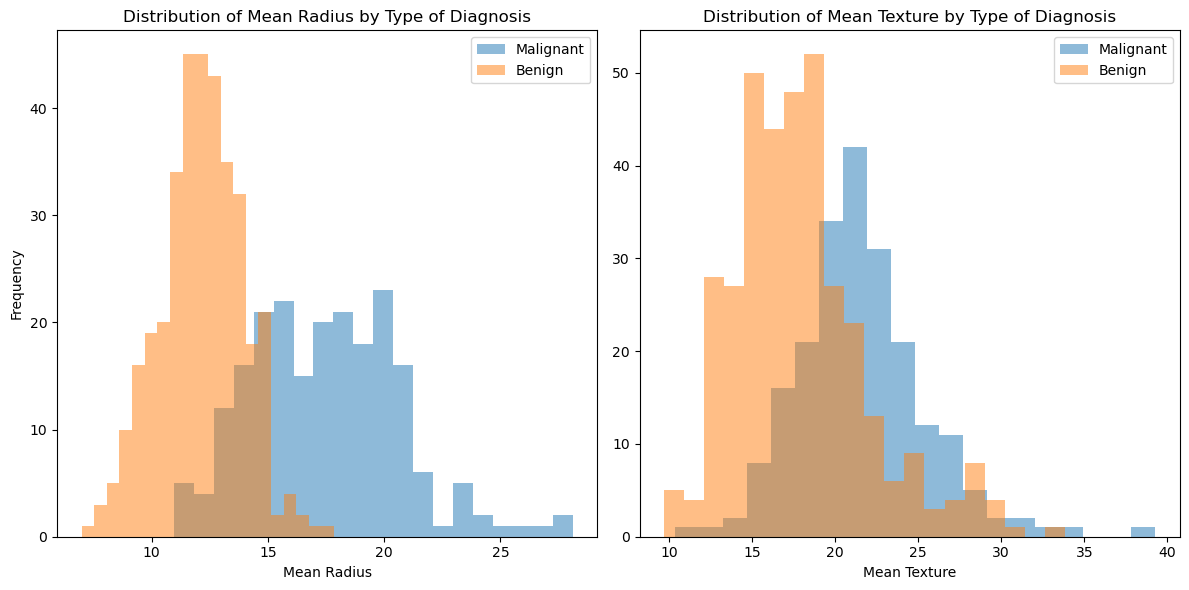

In [36]:

df = pd.read_csv("breast_cancer.csv")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  
plt.hist(df[df['diagnosis'] == 'M']['radius_mean'], bins=20, alpha=0.5, label='Malignant')
plt.hist(df[df['diagnosis'] == 'B']['radius_mean'], bins=20, alpha=0.5, label='Benign')
plt.legend()
plt.title('Distribution of Mean Radius by Type of Diagnosis')
plt.xlabel('Mean Radius')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)  
plt.hist(df[df['diagnosis'] == 'M']['texture_mean'], bins=20, alpha=0.5, label='Malignant')
plt.hist(df[df['diagnosis'] == 'B']['texture_mean'], bins=20, alpha=0.5, label='Benign')
plt.legend()
plt.title('Distribution of Mean Texture by Type of Diagnosis')
plt.xlabel('Mean Texture')

plt.tight_layout()

plt.show()

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
breast_cancer = load_breast_cancer()

# Convert to DataFrame
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

# Add the target column
df['label'] = breast_cancer.target

# Check if 'label' exists now
print(df.columns)


In [ ]:
fig,axes = plt.subplots(nrows=1 , ncols=3, figsize=(16,6))
axes[0].plot(df['texture_mean'],df['radius_mean'],'o')
axes[0].set_ylabel('radius_mean')
axes[0].set_xlabel('texture_mean')


axes[1].plot(df['perimeter_mean'],df['radius_mean'],'o')
axes[1].set_ylabel('radius_mean')
axes[1].set_xlabel('perimeter_mean')


axes[2].plot(df['area_mean'],df['radius_mean'],'o')
axes[2].set_ylabel('radius_mean')
axes[2].set_xlabel('area_mean')

plt.tight_layout();


In [ ]:
print(df.columns)


In [71]:
df['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

In [75]:
df.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [79]:
# separating the features and target
x = df.drop(columns = 'label', axis= 1)
y = df['label']

In [81]:
print(x)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [83]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int32


In [89]:
# splitting the data into training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [91]:
print(x.shape, x_train.shape, x_test.shape)

(569, 30) (455, 30) (114, 30)


In [93]:
# model training
# model regression
model = LogisticRegression()

In [95]:
# training the logistic regression model using training data
model.fit(x_train, y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [97]:
# model evaluation
# accuracy score

In [99]:
# accuracy on training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)

In [103]:
print("accuracy on training data =", training_data_accuracy) 

accuracy on training data = 0.9494505494505494


In [105]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test, x_test_prediction)

In [107]:
print("accuracy on test data =", test_data_accuracy) 

accuracy on test data = 0.9649122807017544


In [109]:
# building a predictive system

In [124]:





# Define input data as a tuple (ensure it has the right number of features)
input_data = (13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259)

# Convert to NumPy array and reshape for model input
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)

# Make prediction
prediction = model.predict(input_data_as_numpy_array)

# Interpret result
if prediction[0] == 0:
    print("The breast cancer is **malignant** (cancerous).")
else:
    print("The breast cancer is **benign** (not cancerous).")


The breast cancer is **benign** (not cancerous).


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
